# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: LOGISTIC REGRESSION
2. Accuracy Score: 95%
3. Cross Validation Score: 96%
4. Final Accuracy Score(After Hyperparamter Tunning):
5. AUC ScorE
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROBLEM STATEMENT(malignant_comment_Project)

Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


# PROJECT CONTENTS
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Descriptive Analysis
 - 2.4:Observations
- Step 3: Exploratory Data Analysis
 - 3.1:Normal Distribution Check
 - 3.2:Scatter Plot Check
 - 3.3:Correlation Check
 - 3.4:Outlier Check
 - 3.5:Skewness Check
 - 3.6:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Arbitrary cutt-off of Target Variable
 - 4.3:Rechecking the current Relationship btw Variable
 - 4.4:Dropping of Features that strongly promotes multicollinearity(VIF)
 - 4.5:Removal of Outliers
 - 4.6:Transforming Data to Remove Skewness using Power transformation
 - 4.7:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:DecisionTree Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# Step 1 - ATTRIBUTES OF VARIABLES

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
import eli5
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

In [138]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:

train_df = pd.read_csv('train.csv')
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('test.csv')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


# Step 2.2 - Load Dataset

In [4]:
#checking the first five rows
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
#checking the last five rows
train_df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
#picking 4 random samples
train_df.sample(4)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
118867,7b528c53a699a9b7,RFA opened for Administrative Abuse \n\nNotified.,0,0,0,0,0,0
32390,56295f3bb3d71a16,There is already a perfectly good article on P...,0,0,0,0,0,0
120038,81f1f70e5a8fbf86,""" \n\n Well, so am I! - don't worry about it. ...",0,0,0,0,0,0
39083,68484cb8bc52fee3,so i got my kyogen book at the library and it ...,0,0,0,0,0,0


# Step 2.3 - Data Descriptive Analysis

In [7]:
#checking the data shape
train_df.shape

(159571, 8)

In [8]:
# Data cleaning
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
#checking for nature of datatypes
train_df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [10]:
#Checking data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
#Checking data full description
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#lets check the columns
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [13]:
#lets drop the id column because its not important to the problem statement
train_df.drop('id',axis=1,inplace=True)

In [14]:
#Checking for null values
train_df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [15]:
#Checking for null values
train_df.isnull().sum().sum()

0

In [16]:
#This is a multiclass problem

In [17]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in malignant - ",Counter(train_df['malignant']))

The Value Counts in malignant -  Counter({0: 144277, 1: 15294})


In [18]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in highly_malignant - ",Counter(train_df['highly_malignant']))

The Value Counts in highly_malignant -  Counter({0: 157976, 1: 1595})


In [19]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in rude - ",Counter(train_df['rude']))

The Value Counts in rude -  Counter({0: 151122, 1: 8449})


In [20]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in threat - ",Counter(train_df['threat']))

The Value Counts in threat -  Counter({0: 159093, 1: 478})


In [21]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in abuse - ",Counter(train_df['abuse']))

The Value Counts in abuse -  Counter({0: 151694, 1: 7877})


In [22]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in loathe - ",Counter(train_df['loathe']))

The Value Counts in loathe -  Counter({0: 158166, 1: 1405})


In [23]:
train_df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [24]:
train_df.shape

(159571, 7)

In [25]:
column =['malignant','highly_malignant','rude','threat','abuse','loathe']

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64>


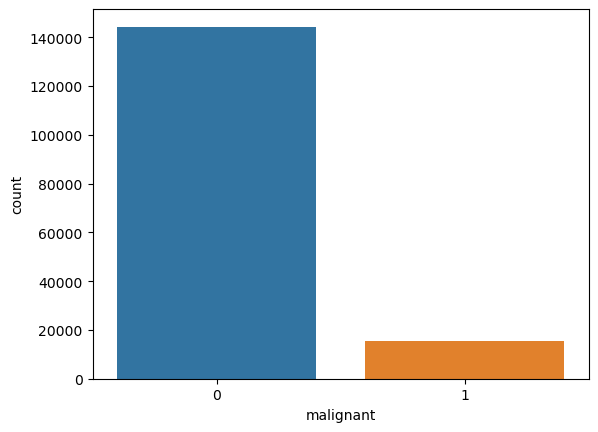

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: highly_malignant, Length: 159571, dtype: int64>


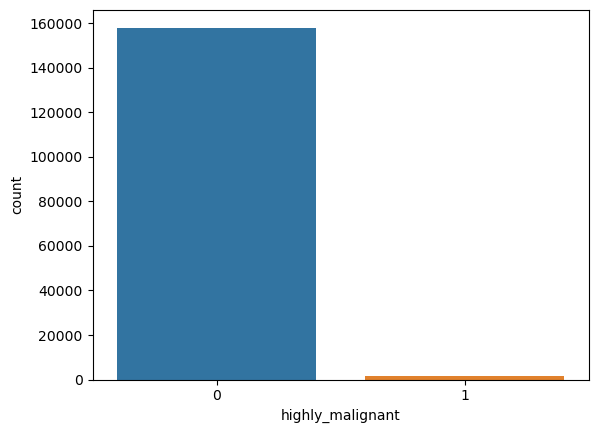

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: rude, Length: 159571, dtype: int64>


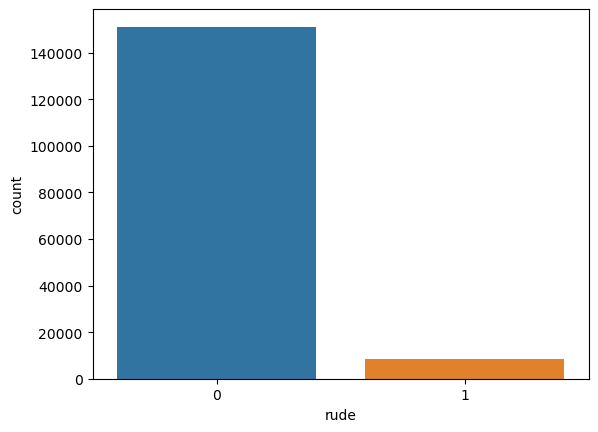

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: threat, Length: 159571, dtype: int64>


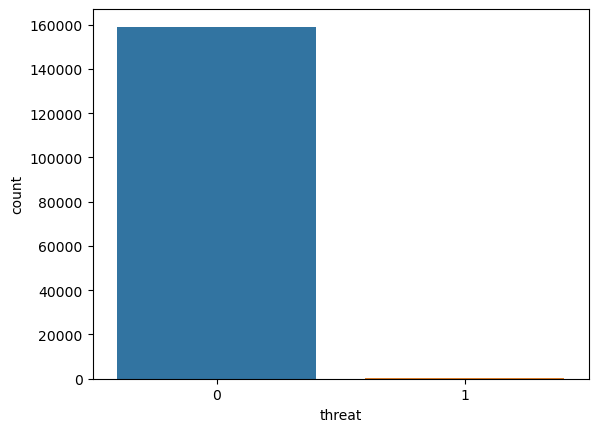

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: abuse, Length: 159571, dtype: int64>


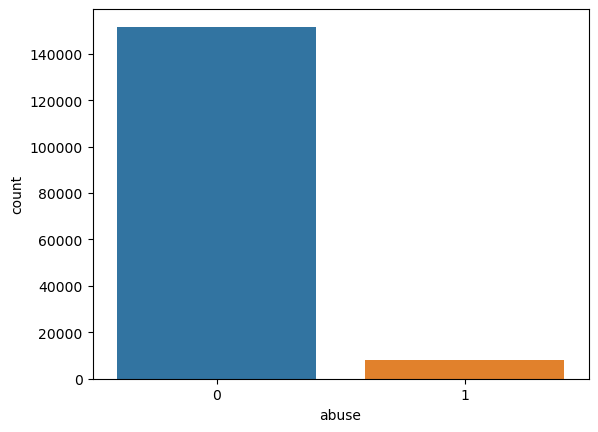

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: loathe, Length: 159571, dtype: int64>


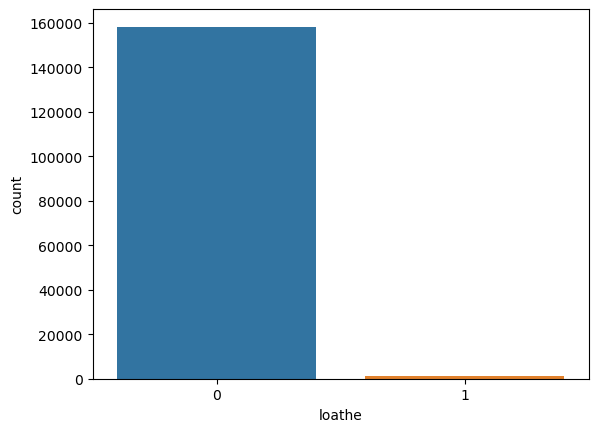

In [26]:
for i in column:
    print(train_df[i].value_counts)
    sns.countplot(train_df[i])
    plt.show()
    

# Step 2.4 - Observations


# The Dataset is made up of;
- 159,571 rows and 7 columns
- 1 features and 1 Target

# Description of Features:
All the features have the following properties:
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

# About the Target/Label:
quality: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is an Interger type
- It is made up of Categorical data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

In [27]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [28]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')

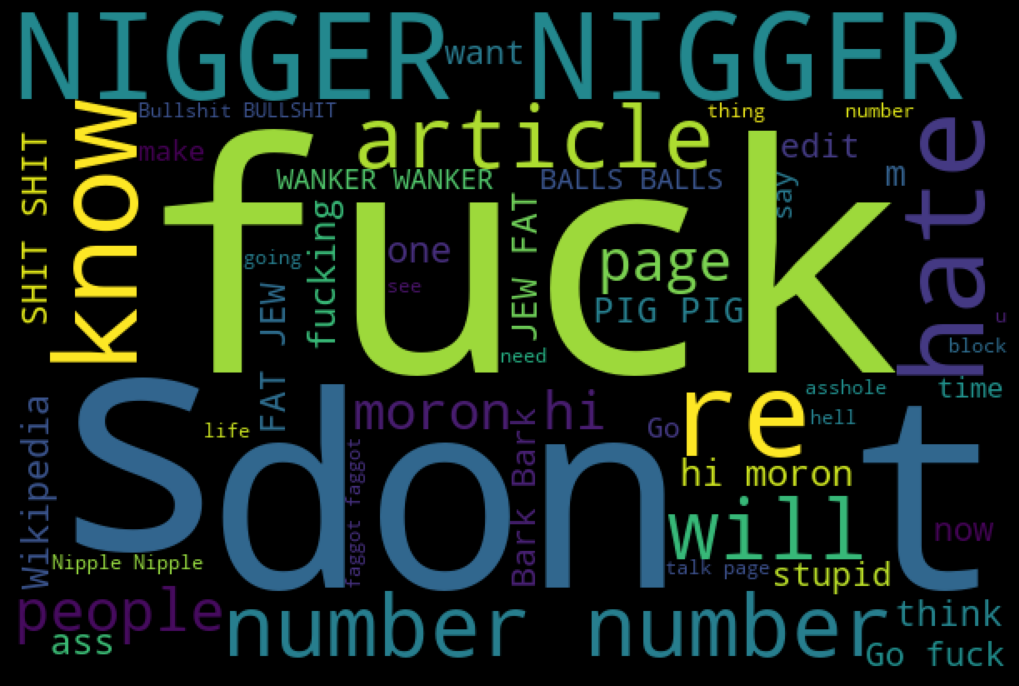

In [29]:
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Step 3.1 - Normal Distribution Check

In [30]:
#checking for general correlation
df.corr()

NameError: name 'df' is not defined

In [ ]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

In [ ]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
train_df.skew()

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence majority of the Columns are having skewness:

 - fixed acidity:           0.98
 - volatile acidity:        0.67
 - residual sugar:          4.54
 - chlorides:               5.68
 - free sulfur dioxide:     1.25
 - total sulfur dioxide:    1.52
 - sulphates:               2.43
 - alcohol:                 0.86

# Step 3.6  - Target Variable Check

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [31]:
#Recheking shape of original data
train_df.shape

(159571, 7)

# Step 4.3 - Rechecking the current Relationship btw Variables

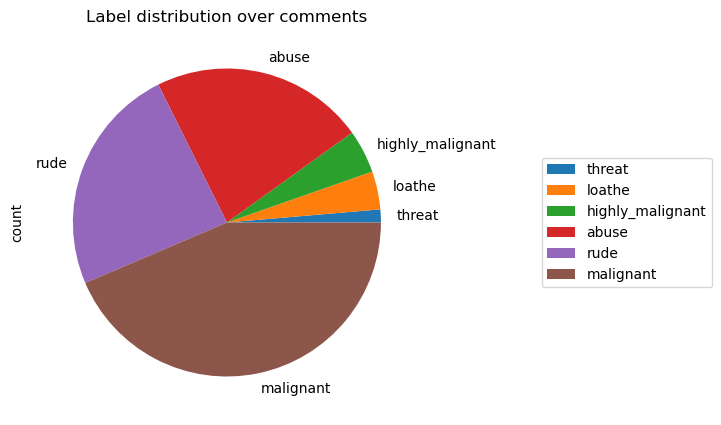

In [32]:
df_distribution = train_df[column].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [33]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [174]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i] = test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        test_df['comment_text'][i] = "".join(j)

KeyboardInterrupt: 

In [ ]:
for i in range(len(train_df['comment_text'])):
    train_df['comment_text'][i] = train_df['comment_text'][i].lower()
    j = []
    for word in train_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        train_df['comment_text'][i] = "".join(j)


In [34]:
#seperating the variables into X and Y variables
x = train_df.drop(['malignant'],axis=1)
y = train_df['malignant']

In [35]:
tf_vec = TfidfVectorizer()

In [36]:
comment = train_df['comment_text']

In [37]:
x = tf_vec.fit_transform(comment)

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State

In [38]:
#Using LogisticRegression to get the best Random state
lr=LogisticRegression()
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  95.6 and 96.1 respectively


The best accuracy is 95.6% at random state 42

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

# Training Model and Metrics Measurement

In [181]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  95.65
Confusion Matrix  [[35887   191]
 [ 1545  2270]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.99      0.98     36078
           1       0.92      0.60      0.72      3815

    accuracy                           0.96     39893
   macro avg       0.94      0.79      0.85     39893
weighted avg       0.96      0.96      0.95     39893



LogisticRegression is producing good accuracy 95.65%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [183]:
#Validation accuracy
vac=cross_val_score(lr,x,y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.95569481 0.95563076 0.95519208 0.95666479 0.95625744]
Cross Validation Score is  0.9558879758424869


# Difference between Accuracy Score and Cross Validation Score

In [184]:
Test_Accuracy_lr

0.9564835936129146

In [185]:
CV_Score_lr

0.9558879758424869

In [186]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0005956177704277144


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.0000595) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [188]:
#Using Decision tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
print("At random state:-","Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- Testing Accuracy and Training Accuracy are:-  93.8 and 100.0 respectively


# Training Model and Metrics Measurement

In [189]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  93.85
Confusion Matrix  [[27905   909]
 [ 1054  2047]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.97      0.97     28814
           1       0.69      0.66      0.68      3101

    accuracy                           0.94     31915
   macro avg       0.83      0.81      0.82     31915
weighted avg       0.94      0.94      0.94     31915



Decision Tree Model is producing good accuracy - 93.85%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [190]:
#Validation accuracy
vac=cross_val_score(dt,x,,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.93877487 0.93661089 0.93714357 0.93664223 0.93780159]
Cross Validation Score is  0.9373946307271369


# Difference between Accuracy Score and Cross Validation Score

In [191]:
Test_Accuracy_dt

0.9384928716904277

In [192]:
CV_Score_dt

0.9373946307271369

In [193]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0010982409632908086


In [146]:
filename='Malignant comment'
pickle.dump(ada,open(filename,'wb'))